# Model interpretability 

Let's start with the basic imports.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Interpretable models
The easiest way to achieve interpretability is to use only a subset of algorithms that create interpretable models. Linear regression, logistic regression and the decision tree are commonly used interpretable models. Here we will quickly revisit the linear regression model.

### Linear regression
Linear regression has the following form:
<div>
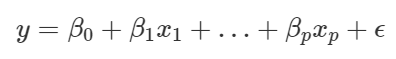
</div>


Let's load the Boston house-prices dataset.

In [2]:
from sklearn.datasets import load_boston
hp= load_boston( )
df = pd.DataFrame(hp.data, columns=hp.feature_names)
df['target']=hp.target

In [3]:
print(hp.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
df.target.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: target, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.2, random_state=42)

We could use *sklearn*'s *LinearRegression* as we did before. However, here we will use the implementation from *statsmodels* ordinary least squares *OLS*, becuase it offers more details using *summary* method.
Please install *statsmodels* with: <br>
`conda install statsmodel`

In [7]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              755.7
Date:                Mon, 19 Apr 2021   Prob (F-statistic):                   1.13e-267
Time:                        11:00:47   Log-Likelihood:                         -1208.5
No. Observations:                 404   AIC:                                      2443.
Df Residuals:                     391   BIC:                                      2495.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1005      0.036     -2.799      0.005      -0.171      -0.030
ZN             0.0342      0.017      2.068      0.039       0.002       0.067
INDUS          0.0336      0.070      0.482      0.630      -0.103       0.171
CHAS           2.7397      0.989      2.771      0.006       0.796       4.683
NOX           -5.1551      3.706     -1.391      0.165     -12.440       2.130
RM             6.1960      0.338     18.352      0.000       5.532       6.860
AGE           -0.0111      0.015     -0.737      0.462      -0.041       0.018
DIS           -1.0200      0.218     -4.669      0.000      -1.450      -0.591
RAD            0.1388      0.075      1.855      0.064      -0.008       0.286
TAX           -0.0078      0.004     -1.790      0.074      -0.016       0.001
PTRATIO       -0.4541      0.119     -3.815      0.000      -0.688      -0.220
B              0.0168      0.003      5.728      0.000       0.011       0.023
LSTAT         -0.4259      0.055     -7.699      0.000      -0.535      -0.317
==============================================================================
Omnibus:                      154.481   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1082.869
Skew:                           1.452   Prob(JB):                    7.21e-236
Kurtosis:                      10.477   Cond. No.                     8.46e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretability of Linear Regression
- The coefficients of a linear regression are directly interpretable. Each coefficient of a numerical feature describes the effect on the output of a change of 1 unit of a given input, when all other features remain fixed.
- The importance of a feature can be seen as the absolute value of the t-statistic value. A feature is important if its coefficient is high and the variance around this estimate is low.
<div>
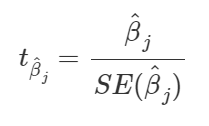
</div>
- The variance explained by the model can be explained by the $R^2$ coefficient, displayed in the summary above.

Interpretation of a numerical feature (*RM* average number of rooms per dwelling): An increase of the average number of rooms per dwelling by 1 increases the predicted price by 6.196, when all other features remain fixed.

All the interpretations always come with the footnote that "all other features remain the same". This is because of the nature of linear regression models. The predicted target is a linear combination of the weighted features. Increasing one feature, but not changing another, can lead to unrealistic or at least unlikely data points. For example increasing the number of rooms might be unrealistic without also increasing the size of a house.

Let's plot the coefficients (we can access them using *params* attribute):

In [8]:
model.params

CRIM      -0.100472
ZN         0.034176
INDUS      0.033571
CHAS       2.739652
NOX       -5.155120
RM         6.195973
AGE       -0.011081
DIS       -1.020035
RAD        0.138818
TAX       -0.007797
PTRATIO   -0.454087
B          0.016843
LSTAT     -0.425892
dtype: float64

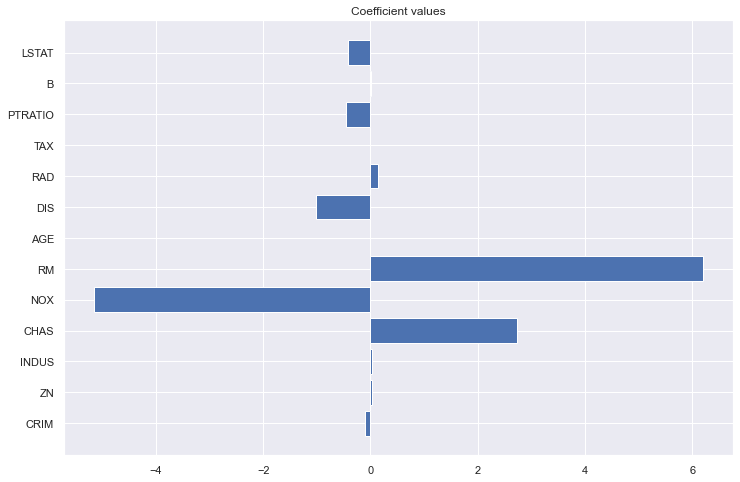

In [9]:
plt.figure(figsize=(12,8))
plt.barh(X_train.columns,model.params)
plt.title("Coefficient values")
plt.show()

The coefficient plot shows that *RM* (average number of rooms per dwelling) has a strong positive effect on the predicted price.  The problem with the coefficient plot is that the features are measured on different scales. You can make the estimated coefficients more comparable by scaling the features (zero mean and standard deviation of one) before fitting the linear model, as we have done before.

## Model agnostic methods

The following exercise has been adapted from:<br>
https://www.dataminingapps.com/2019/05/five-model-agnostic-interpretability-checks-to-look-at-before-deploying/ <br>
and <br>
https://www.explorium.ai/blog/interpretability-and-explainability-part-2/

We will use the breast cancer dataset from *sklearn*:

In [10]:
from sklearn.datasets import load_breast_cancer
bc= load_breast_cancer( )
df = pd.DataFrame(bc.data, columns=bc.feature_names)
df['target']=bc.target

In [11]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [12]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Note that the positive class here denotes the benign case.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.2, random_state=42)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [15]:
pd.set_option('display.max_columns', 40)
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


We will use a Random Forest Classifier:

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Feature Importance
Feature importance rankings are a common approach to explain how a model works. Several approaches to calculate feature importance rankings exist (based on dropping a feature and retraining the model, based on permutations, or based on mean decrease in impurity – which is model-dependent). We focus here on permutation importance, which is fast to compute and widely used. The idea is simple: for each feature, generate a new feature matrix by permuting that feature and leaving the others alone. By permuting, we mean here that we randomly “shuffle” that feature around, not that we add a sampled noise factor. Next, we ask the model to predict on this new feature matrix, and see for which features the predictions have deviated the most.
Feature importance plots are commonly used to get an initial idea regarding which features end up being most important in the model. This is used to communicate results, and – in some cases – as a feature selection approach as well.

We can compute:

In [17]:
from sklearn.inspection import permutation_importance
perm = permutation_importance(rf, X_train, y_train, n_repeats=30, random_state=42)

We measure the randomness by repeating the process with multiple shuffles. We can access the mean of importances with *importances_mean* attribute and the standard deviations with *importances_std*:

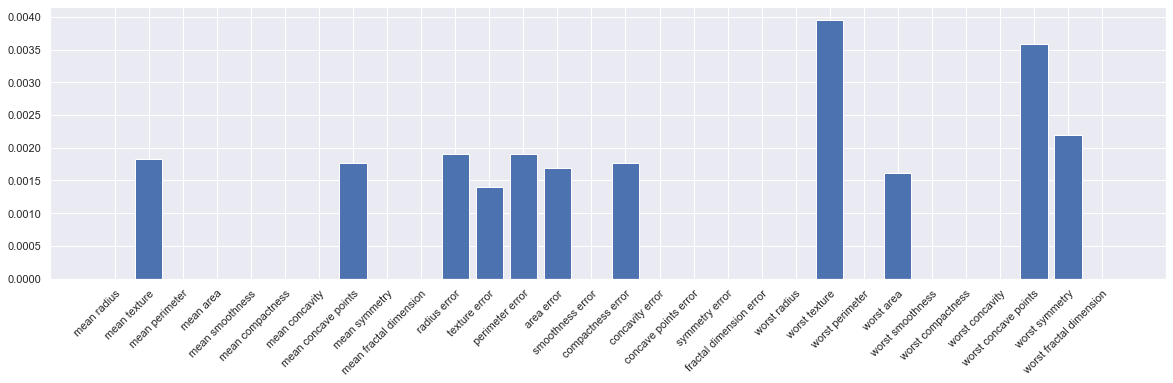

In [18]:
fi = perm.importances_mean
fig, ax = plt.subplots(figsize=(20, 5))
ax.bar(range(len(fi)), fi, align="center")
ax.set(xticks=range(len(fi)), xticklabels=X_train.columns)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.show()

In our example, the most important feature is *worst texture* and *worst concave points*. 

When two features are correlated and one of the features is permuted, the model will still have access to the feature through its correlated feature. This will result in a lower importance value for both features, where they might actually be important.
As such, take care when inspecting feature importance plots, and make sure to contrast them with a correlation analysis. 

Recall that Random Forest has built-in feature importance method, based on calculating the Gini index, and acessed using *feature_importance_* attribute.

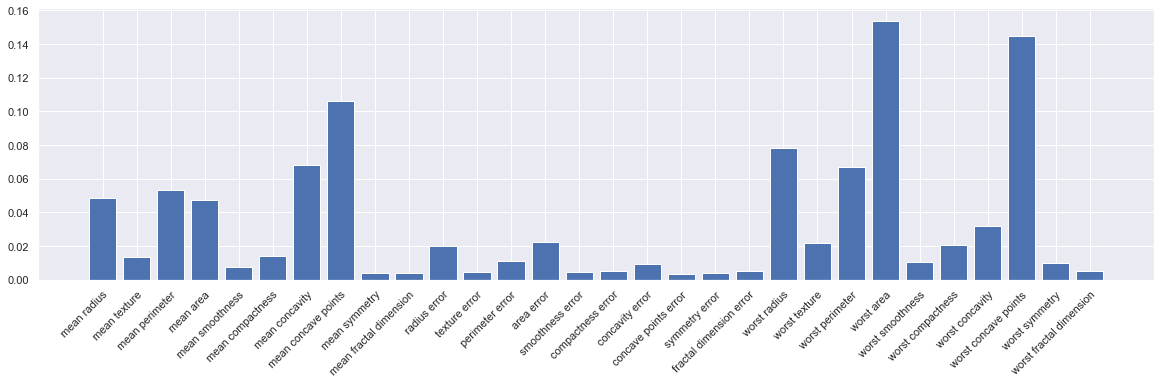

In [19]:
fi = rf.feature_importances_
fig, ax = plt.subplots(figsize=(20, 5))
ax.bar(range(len(fi)), fi, align="center")
ax.set(xticks=range(len(fi)), xticklabels=X_train.columns)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.show()

For comparison of the two approaches for the *RandomForestClassifier* you can check the link: <br>
https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py

### Partial dependance plots

*sklearn* has partial dependance plots, which can be imported as follows:<br>
`from sklearn.inspection import plot_partial_dependence` <br>
There is also a specific library *pdpbox*. Here we are going to demonstrate the usage from *pdpbox*, whereas the usage from *sklearn* is illustrated here:
https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html#sphx-glr-auto-examples-inspection-plot-partial-dependence-py

For the following section, please install *pdpbox* as follows:<br>
`conda install -c conda-forge pdpbox`   

Let's start our analysis with the variable *mean concavity*. Lets examine plotting the effect of *mean concavity* on the target. The next figure shows the results of the PDP application on the training data (not the predictions).

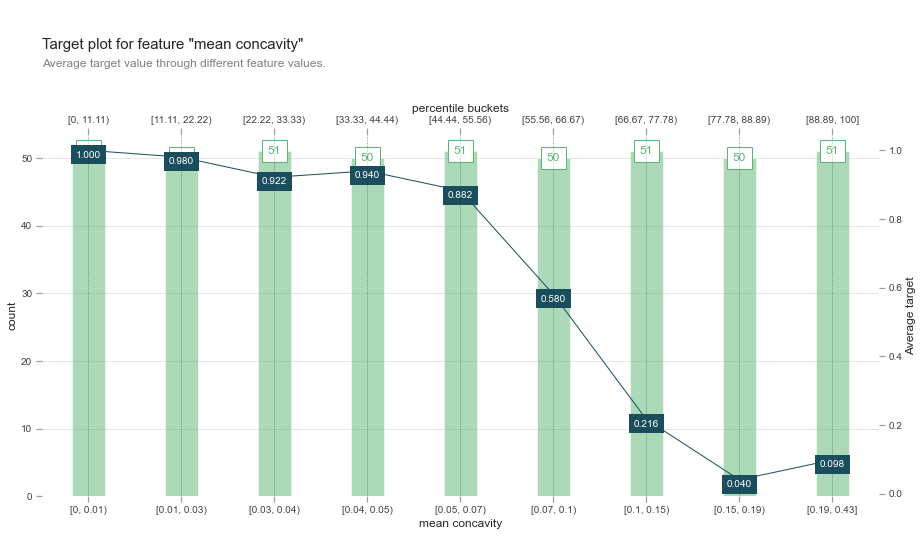

In [20]:
Xy_train=X_train.copy()
Xy_train['target'] = y_train
from pdpbox import pdp, get_dataset, info_plots
fig, axes, summary_df = info_plots.target_plot(
df=Xy_train, feature='mean concavity', feature_name='mean concavity', target='target', show_percentile=True)


This figure shows that, in the data, lower values of mean concavity are associated with higher values of probability of benign class. We can also look at the trained model’s predictions:

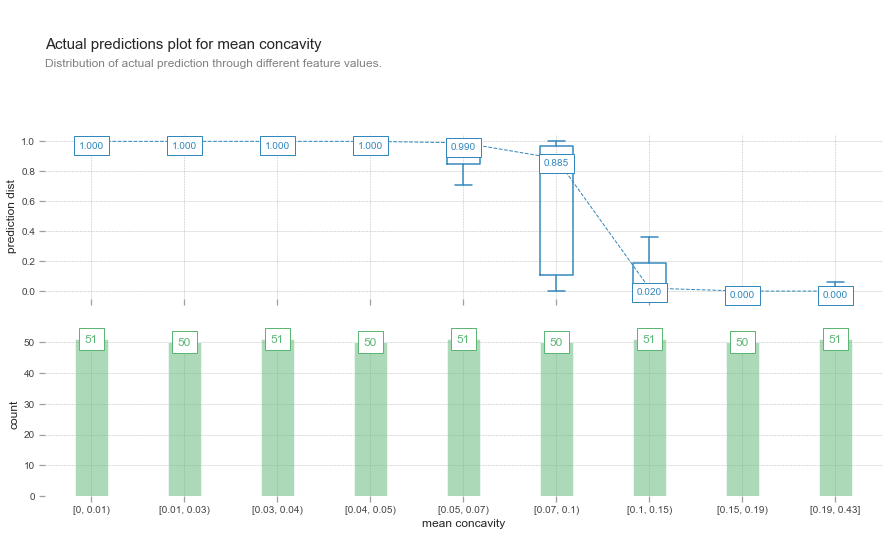

In [21]:
fig, axes, summary_df = info_plots.actual_plot(
model=rf, X=X_train, feature='mean concavity', feature_name='mean concavity')

This figure confirms the findings from the previous one: lower values of the radius are associated with the higher probability. This finding shows that our model was able to capture this data pattern.

Partial Dependence Plots (PDP) show how a feature affects predictions. They are calculated after a model has been fitted. The blue area corresponds to an empirical confidence interval. PDPs show the average trend and confidence levels. It makes trends easier to understand, although we loose the low-level vision for each prediction.

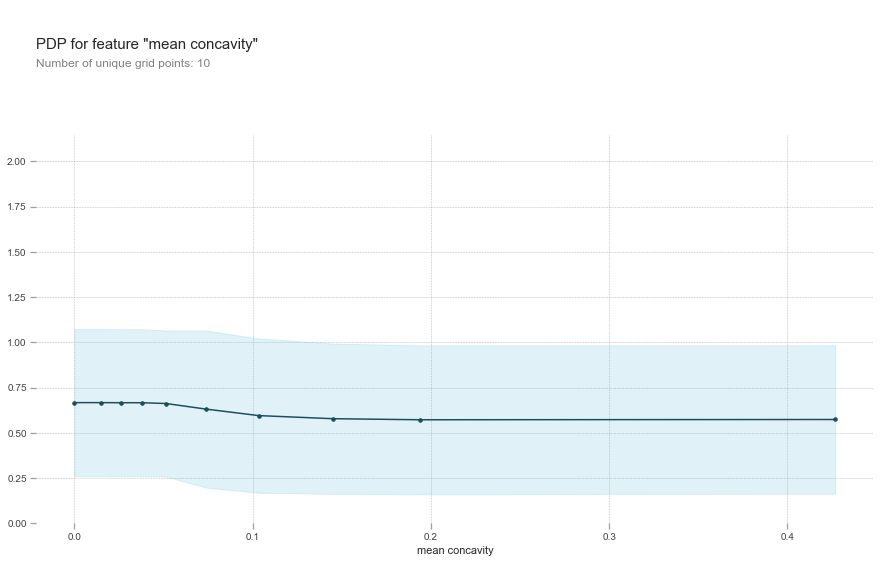

In [22]:
pdp_res = pdp.pdp_isolate(model=rf, dataset=X_train, model_features=X_train.columns, feature='mean concavity')

pdp.pdp_plot(pdp_res, 'mean concavity', center =False)
plt.show()

Note that *target_plot* and *actual_plot* look at the target’s ratio’s over values of a certain feature based on observing the training set or the model predictions. This is different from the partial dependence plot is that a partial dependence plot shows “marginal effects”, i.e. the values on the y-axis are normalized so that effects of variables can be compared across partial dependence plots – though the actual difference is indeed quite small.

More variation for any given predictor variable in the plot means the value of that variable affects the model quite a lot, but if the line is constant near zero it does not mean there is no effect.

Just as with feature importance rankings, partial dependence plots work in a univariate setting so that certain dependencies might not show up for a particular feature if a strong interaction is present with another feature. A good rule of thumb is thus to not assume there is no effect in case a flat partial dependence plot is shown. We can also plot interactions between features on a 2D graph.

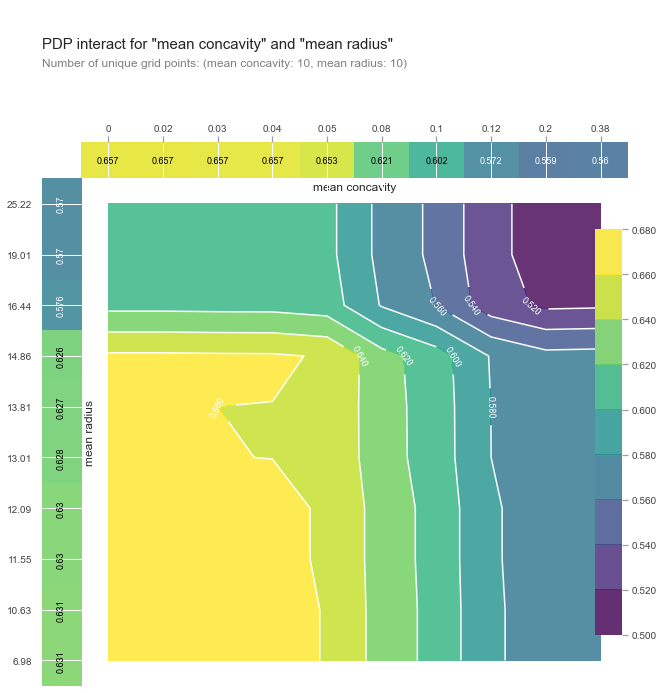

In [23]:
features_to_plot = ['mean concavity', 'mean radius']

inter1  =  pdp.pdp_interact(model=rf, dataset=X_test, model_features=X_test.columns, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour', x_quantile=True, plot_pdp=True)
plt.show()

This plot helps to identify regions in which the tumor is more likely to be benign (lighter regions) rather than malignant (darker regions) based on the interaction between the mean of the radius and the mean concavity. We can then create similar plots for all pairs of variables.

Actual prediction plots show the medium value of actual predictions through different feature values for two features:

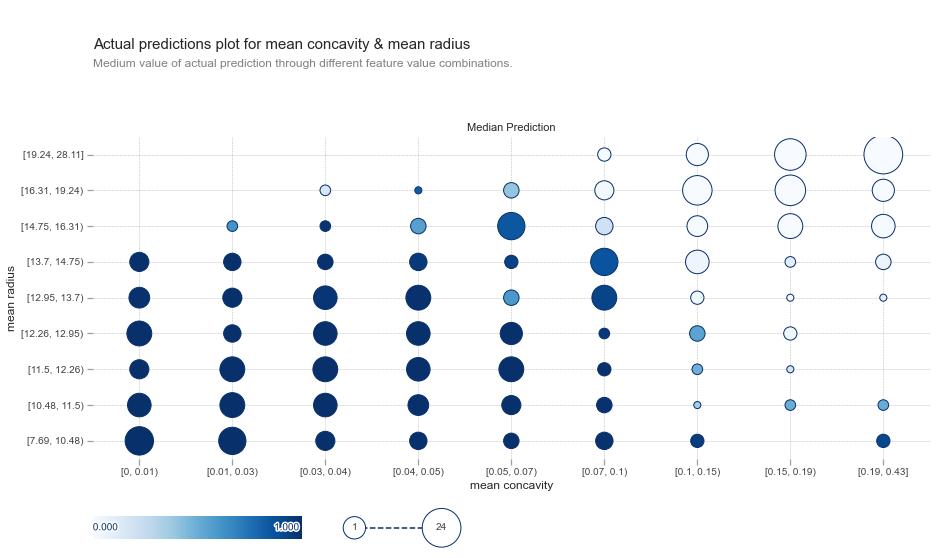

In [24]:
fig, axes, summary_df = info_plots.actual_plot_interact(model=rf, X=X_train, features=features_to_plot, feature_names=features_to_plot)

In this chart the bubble size is of less importance, since it reflects the number of observations. The most important insight comes from the colour of the bubble, with darker bubbles meaning higher probabilities.

### Individual conditional expectation (ICE) 
A very similar alternative technique is individual conditional expectation (ICE) plots. Here, the idea is that we visualize the dependence of the prediction for a feature under observation for each instance separately. We do not create an “average instance”, but plot a line for each observation where all features are kept as-is, except for the feature under observation, where we again slide over different values and query the model. It is common practice to center the ICE lines at the zero-point and plot an average over the lines. This approach is better suited to spot possible interaction effects.

(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': {'_pdp_ax': <AxesSubplot:>,
   '_count_ax': <AxesSubplot:title={'center':'distribution of data points'}, xlabel='mean concavity'>}})

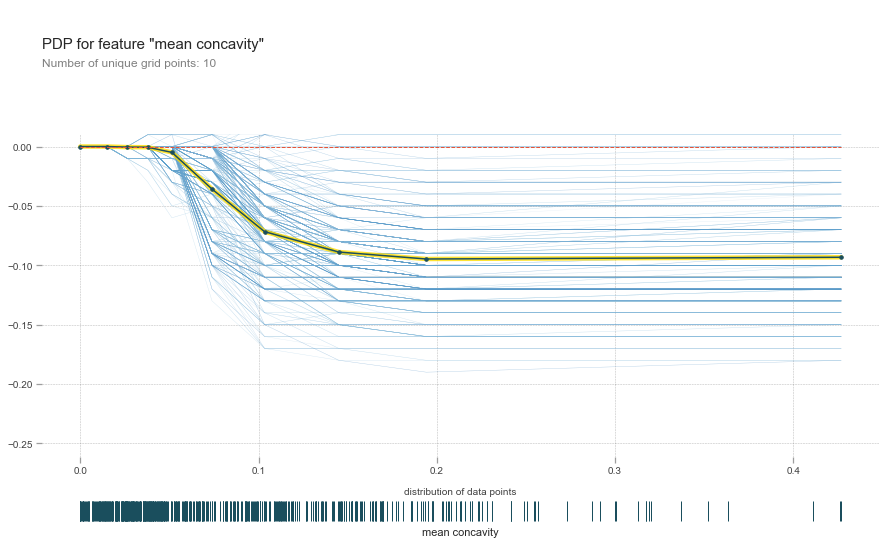

In [25]:
pdp_res = pdp.pdp_isolate(
    model=rf, dataset=X_train, model_features=X_train.columns, feature='mean concavity'
)

pdp.pdp_plot(pdp_res, 'mean concavity', plot_lines=True, plot_pts_dist=True)

Typically, one should inspect both the training and the test set for a complete analysis. The training data reveals insights on what the model has picked up, whereas inspecting the results on the test set gives insights towards how generalizable these patterns are.

### Local Interpretable Model-agnostic Explanations (LIME)
LIME trains a local explainable models to explain individual predictions. We want the explanation to reflect the behavior of the model “around” the instance that we predict. This is called “local fidelity”.

We first select the instance we want to explain. By making small variations in the input data to the black-box model, we generate a new training set with these samples and their predicted labels. We then train an interpretable classifier on those new samples, and weight each sample according to how “close” it is to the instance we want to explain.

We benefit from the advantages of the interpretable model to explain each prediction.

We can install library *LIME* with <br> 
`pip install LIME`

In [26]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, 
                                                   verbose=True,
                                                   discretize_continuous=True)

We have defined the *explainer*. Note that the default mode is classification, and if we had regression we would need to specify *mode=regression*. We can now explain 20-th instance :

In [27]:
exp = explainer.explain_instance(X_test.iloc[20, :], predict_fn=rf.predict_proba,
                                 num_samples=100, num_features=5)

Intercept 0.5409173783446731
Prediction_local [0.73937074]
Right: 0.85


We make the choice to use 5 features here, but we could use more. To display the explanation :

In [28]:
exp.show_in_notebook(show_table = True, show_all= False)

Since we had the *show_all* parameter set to false, only the features used in the explanation are displayed. The *Feature - Value* table is a summary of the instance we’d like to explain. The *Value* column displays the original value for each feature.

The prediction probabilities of the black box model are displayed on the left.

The prediction of the local surrogate model stands under the 0 or the 1. Here, the local surrogate and the black box model both lead to the same output. It might happen, but it’s quite rare, that the local surrogate model and the black box one do not give the same output. In the middle graph, we observe the contribution of each feature in the local interpretable surrogate model, normalized to 1. This way, we know the extent to which a given variable contributed to the prediction of the black-box model.
Features in orange support class 1 and those in blue support class 0. Float point numbers on the horizontal bars represent the relative importance of these features.

### SHAP (SHapley Additive exPlanations)
The Shapley value is the average contribution of a feature value to the prediction in different coalitions. Shapley values are a robust mechanism to assess the importance of each feature to reach an output, and hence form a better alternative to standard feature importance mechanisms. 
The most common implementation is provided by the *shap* library. It contains implementations for several types of explanations that leverage Shapley values. These include the *TreeExplainer* which is optimized for tree-based models, *DeepExplainer* and *GradientExplainer* for neural networks, and *KernelExplainer*, which makes no assumptions about the underlying model to be explained. 

Let's use *shap* to explain the prediction of one datapoint.

Here we will use *TreeExplainer*, since our model is Random Forest.

In [29]:
import shap

row = 20
data_for_prediction = X_test.iloc[row]   
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(data_for_prediction)

The shap_values is a list with two arrays. It’s cumbersome to review raw arrays, but the shap package has a nice way to visualize the results.

In [30]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

You can visualize feature attributions such as Shapley values as "forces". Each feature value is a force that either increases or decreases the prediction. The prediction starts from the baseline. The baseline for Shapley values is the average of all predictions. In the plot, each Shapley value is an arrow that pushes to increase (positive value) or decrease (negative value) the prediction. These forces balance each other out at the actual prediction of the data instance.

The output prediction is 1, which means the model classifies this observation as benign. The base value is 0.6321. Feature values that push towards a malignant tumor causing are in blue, and the length of the region shows how much the feature contributes to this effect. Feature values decreasing the prediction and making our tumor benign are in pink. If you subtract the length of the blue bars from the length of the pink bars, it equals the distance from the base value to the output.

To get an overview of which features are most important for a model on a global level, we can plot the SHAP values of every feature for every sample. The idea behind SHAP feature importance is simple: Features with large absolute Shapley values are important.

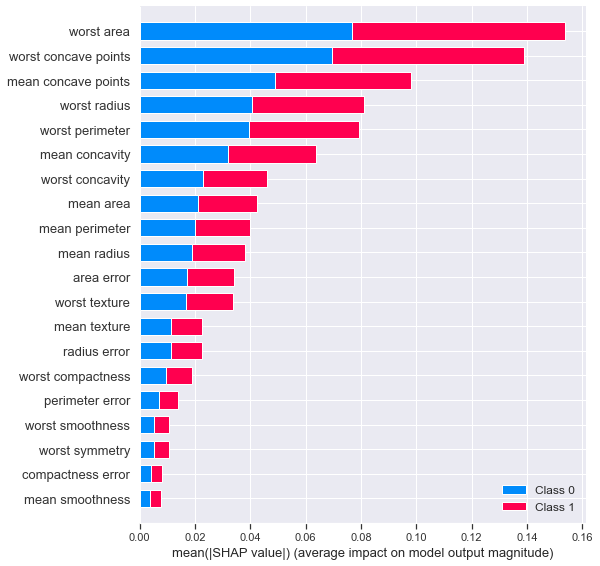

In [31]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

We can also plot the *summary_plot* for each feature and an instance.

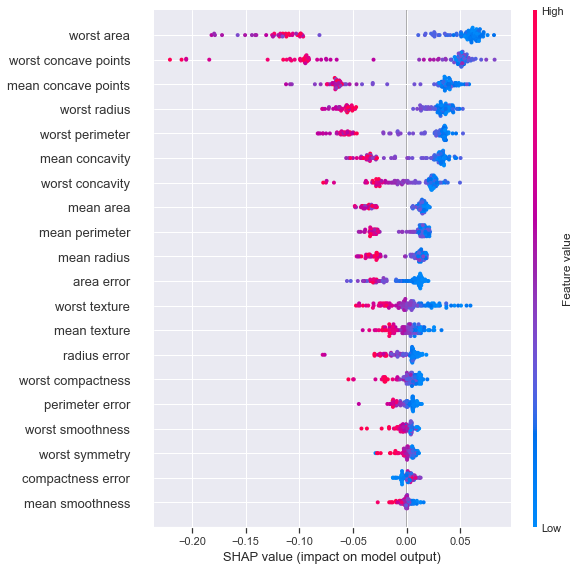

In [32]:
shap.summary_plot(shap_values[1], X_test, plot_type='dot')

Each point on the summary plot is a Shapley value for a feature and an instance. 
- The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. 
- The color represents the value of the feature from low to high. 
-  Variables are ranked in descending order.
- The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
-  Color shows whether that variable is high (in red) or low (in blue) for that observation.
-  A low value of the *worst_area*  has a positive impact on the probability of the tumor being benign. The "low" comes from the blue color, and the "positive" impact is shown on the X-axis. Similarly,  a high value of the *worst_area*  has a large and negative impact on the probability of the tumor being benign.

Like many other methods above, Shapley values might end up being incorrectly estimated when features are correlated or interact with one another.